## Access the dataset

In [1]:
#!pip install -q kaggle   # install libery called kaglle

In [2]:
#! mkdir ~/.kaggle   # make new directoruy to save kaggle object

In [3]:
#! cp  kaggle.json ~/.kaggle # copy kaggle.json to my directory

In [4]:
#! chmod 600 ~/.kaggle/kaggle.json  # change access mode to be (readable & writble )

In [5]:
#! kaggle datasets list   # check conniction statues between colab & kaggle.

ref                                                                    title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset                     Customer Shopping Trends Dataset                   146KB  2023-10-05 06:45:37          12284        269  1.0              
sujay1844/used-car-prices                                              Used Car Prices                                    139KB  2023-10-24 18:01:43            802         23  1.0              
nelgiriyewithana/billionaires-statistics-dataset                       Billionaires Statistics Dataset (2023)             139KB  2023-09-29 13:39:28           6461        168  1.0              
lorenzovzquez/data-jobs-salari

In [6]:
#! kaggle datasets download -d abdallahalidev/plantvillage-dataset

100% 2.04G/2.04G [00:11<00:00, 228MB/s]
100% 2.04G/2.04G [00:11<00:00, 186MB/s]


In [7]:
#! unzip /content/plantvillage-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e6938d9-1ab0-4728-993c-1069b66ce73b___UF.GRC_YLCV_Lab 02727_final_mas

## Import librarries

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras


## Read the data

In [94]:
path = '/content/plantvillage_dataset/color'
train_ds , test_ds = keras.utils.image_dataset_from_directory(
    path ,
    image_size=(224,224),
    batch_size=32 ,
    seed = 123 ,
    validation_split=.2,
    subset='both'
)


Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Using 10861 files for validation.


In [95]:
classes = train_ds.class_names
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

## Visualize some images

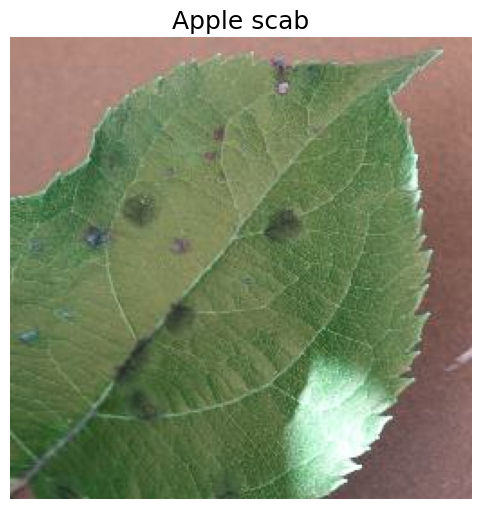

In [96]:
image = cv2.imread("/content/plantvillage_dataset/color/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Apple scab',size =18 )
plt.axis('off')
plt.show()

----------------------------------

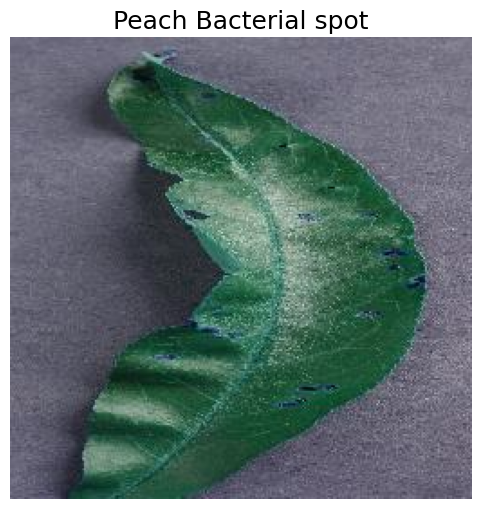

In [97]:
image = cv2.imread("/content/plantvillage_dataset/color/Peach___Bacterial_spot/00e6ad4a-5a62-48d7-ac68-9c0b8ec87f5f___Rut._Bact.S 1472.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Peach Bacterial spot',size =18 )
plt.axis('off')
plt.show()

-----------------------------

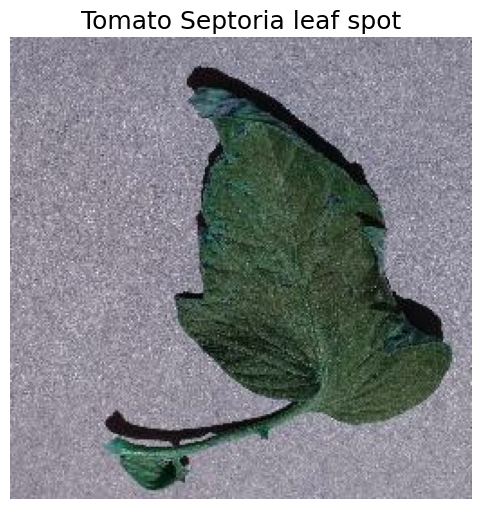

In [98]:
image = cv2.imread("/content/plantvillage_dataset/color/Tomato___Septoria_leaf_spot/015c2613-fb1c-4f31-88f1-c7e5be9ddc97___JR_Sept.L.S 8431.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Tomato Septoria leaf spot',size =18 )
plt.axis('off')
plt.show()

----------------------------------------
## Build Neural network

In [99]:
from keras.src.layers.core.dense import Dense
from keras.src.layers.pooling.max_pooling2d import MaxPool2D
model = keras.Sequential([
    keras.layers.Rescaling(scale = 1/255 , input_shape =(224,224,3) ) ,

    keras.layers.Conv2D(32 , (3,3) , activation = 'relu'),
    keras.layers.MaxPool2D((2,2))                     ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,

    # fully connected layers

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(38,activation ='sigmoid')

])

In [100]:
model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

In [101]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                

In [102]:
history = model.fit(train_ds , epochs = 20)

Epoch 1/20
1358/1358 [==============================] - 116s 83ms/step - loss: 1.6729 - accuracy: 0.5243
Epoch 2/20
1358/1358 [==============================] - 112s 82ms/step - loss: 0.6227 - accuracy: 0.8008
Epoch 3/20
1358/1358 [==============================] - 112s 82ms/step - loss: 0.3954 - accuracy: 0.8719
Epoch 4/20
1358/1358 [==============================] - 111s 82ms/step - loss: 0.2986 - accuracy: 0.9032
Epoch 5/20
1358/1358 [==============================] - 111s 81ms/step - loss: 0.2371 - accuracy: 0.9221
Epoch 6/20
1358/1358 [==============================] - 111s 81ms/step - loss: 0.2059 - accuracy: 0.9318
Epoch 7/20
1358/1358 [==============================] - 110s 81ms/step - loss: 0.1782 - accuracy: 0.9406
Epoch 8/20
1358/1358 [==============================] - 110s 81ms/step - loss: 0.1594 - accuracy: 0.9452
Epoch 9/20
1358/1358 [==============================] - 110s 81ms/step - loss: 0.1468 - accuracy: 0.9502
Epoch 10/20
1358/1358 [==============================] 

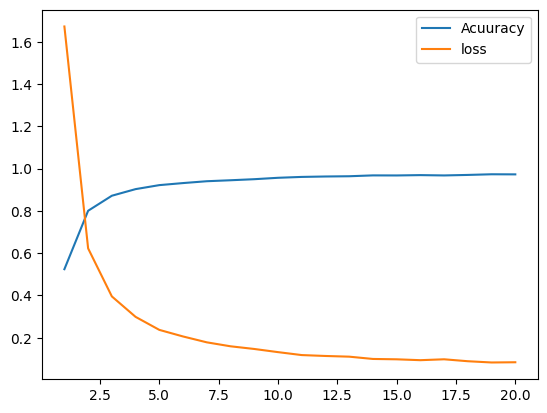

In [107]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1,21)

plt.plot(epochs , accuracy , label = 'Acuuracy')
plt.plot(epochs , loss , label = 'loss')
plt.legend()
plt.show()

In [103]:
model.evaluate(test_ds)

340/340 [==============================] - 12s 36ms/step - loss: 0.3217 - accuracy: 0.9139


[0.3216695785522461, 0.9139121770858765]

------------------------------------------
## Test model predictions

In [104]:
def img_to_pred(image):
  image = image.numpy()
  image = tf.expand_dims(image,0)
  return image

1/1 [==============================] - 0s 25ms/step


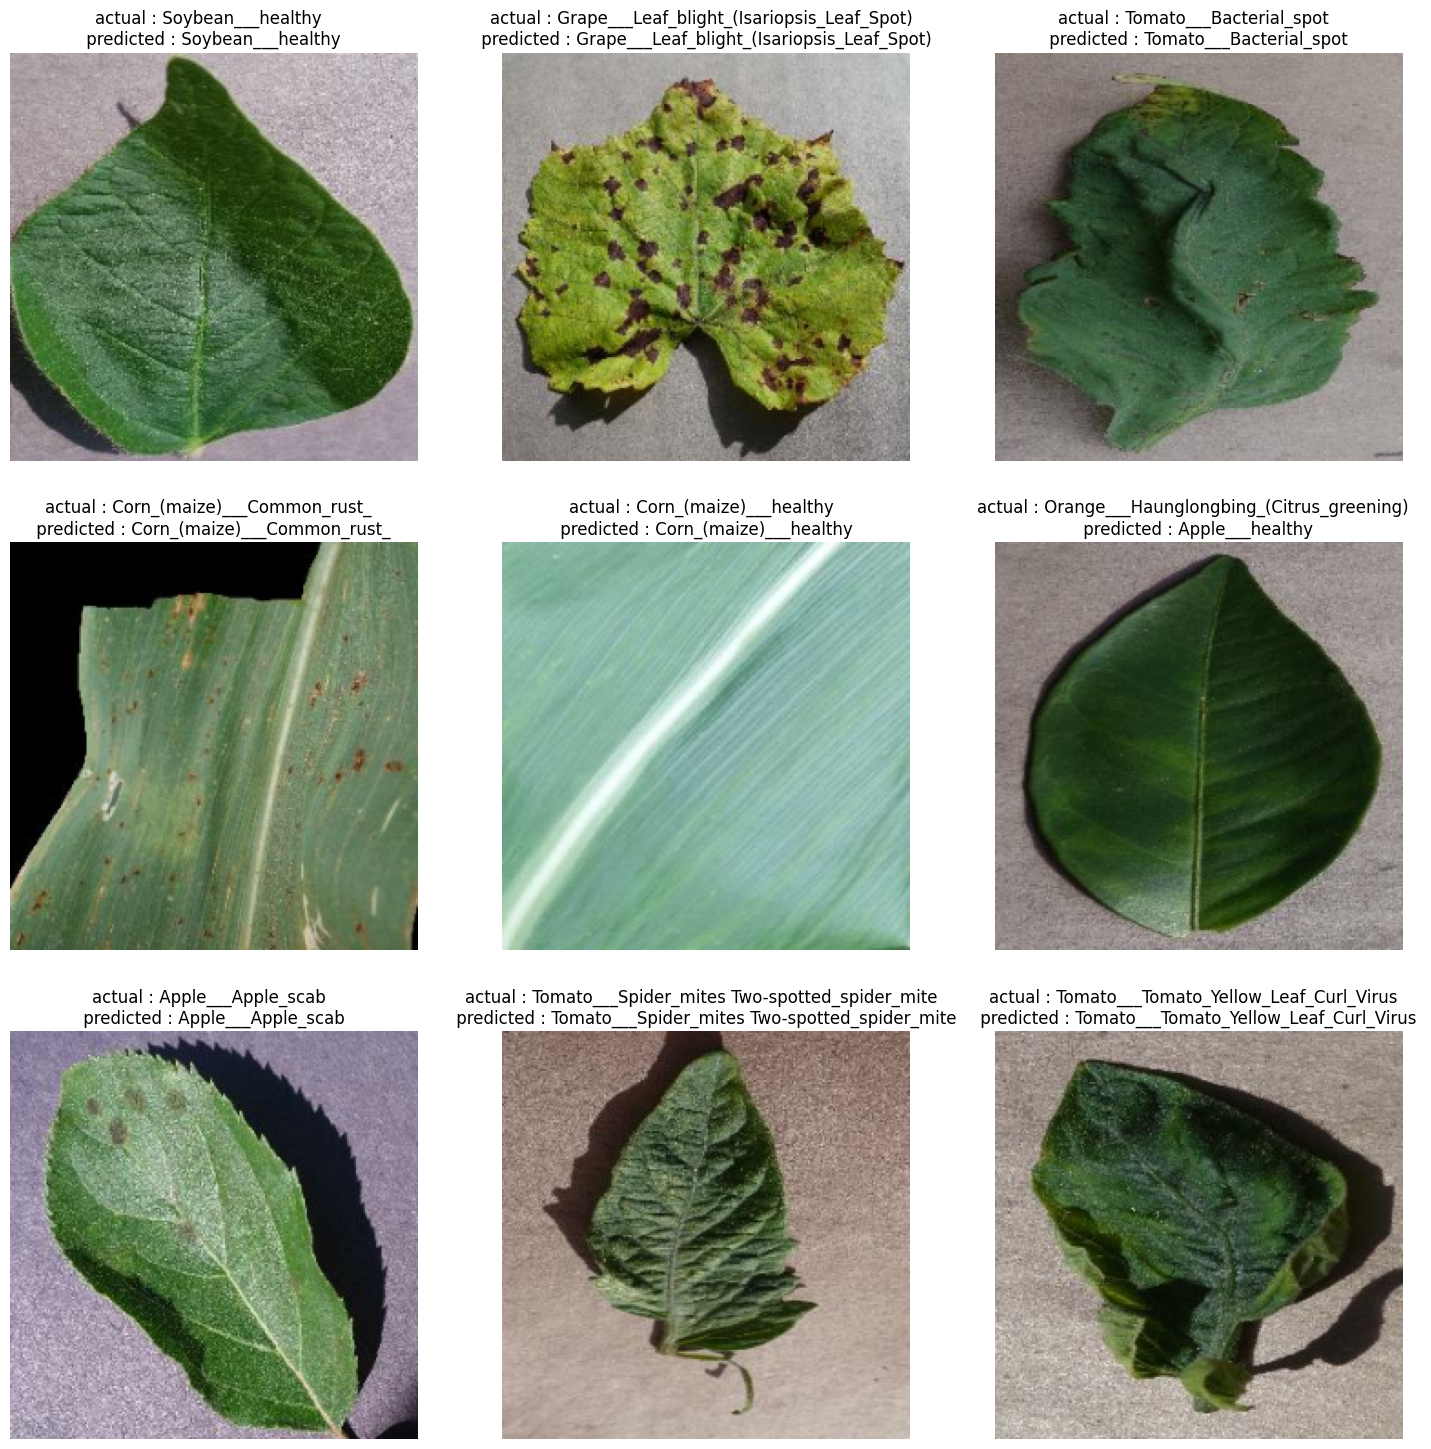

In [114]:
plt.figure(figsize=(18,18))
for images, labels in test_ds.take(1) : # take the first patch
  for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(images[i].numpy().astype('uint32'))
    plt.axis('off')
    actual = classes[labels[i]]
    predict =classes[np.argmax( model.predict(img_to_pred(images[i])))]
    plt.title(f"actual : {actual}  \n predicted : {predict} ")